# TP Python

## Chaines de Markov

Pour ce TP, on fera appel aux matrices en Python. Pour cela on utilisera `numpy` avec la commande d’import `import numpy as np`.
Une matrice sera alors obtenue avec une commande du type `A = np.array([[1,2],[0,1]])` qui donne la matrice

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

A = np.array([(1,2),(0,1)])
print(A.view())

[[1 2]
 [0 1]]


### Exercice 1

Ecrire une fonction `matrice_stochastique` qui prend une matrice en argument, vérifie qu’elle est stochastique et retourne `True` ou `False` selon qu’elle est ou non stochastique.

In [3]:
def matrice_carree(m) -> bool:
    if len(m) == 0:
        return False
    if len(m) == len(m[0]):
        return True
    return False

def matrice_stochastique(m) -> bool:
    if not matrice_carree(m):
        print("Attention : matrice non carrée (ou vide) passée en paramètre !")
        return False
    width = len(m) # on considere que la matrice est carrée
    for x in range(width):
        sum = 0
        for y in range(width):
            val = m[y][x]
            if val < 0:
                return False
            sum += val
        if sum != 1:
            return False
    return True

A = []
B = np.array([(1/2, 1/3), (1/2, 2/3)])
C = np.array([(-1/2, 0),(3/2, 1)])
D = np.array([(1,2),(1,2),(1,2)])

print(A, matrice_stochastique(A), "(attendu : False et alerte)")
print()
print(B.view(), '\n', matrice_stochastique(B), "(attendu : True)")
print()
print(C.view(), '\n', matrice_stochastique(C), "(attendu : False)")
print()
print(D.view(), '\n', matrice_stochastique(D), "(attendu : False et alerte)")

Attention : matrice non carrée (ou vide) passée en paramètre !
[] False (attendu : False et alerte)

[[0.5        0.33333333]
 [0.5        0.66666667]] 
 True (attendu : True)

[[-0.5  0. ]
 [ 1.5  1. ]] 
 False (attendu : False)

Attention : matrice non carrée (ou vide) passée en paramètre !
[[1 2]
 [1 2]
 [1 2]] 
 False (attendu : False et alerte)


### Exercice 2

Écrire une fonction `chaine_irreductible` qui prend une matrice stochastique $P$ en argument et retourne `True` ou `False` selon que la chaine de Markov associée est ou non irréductible. On ajoutera une alerte si la matrice donnée n’est pas stochastique.

Pour cela, on calculera $P, P^2, ... , P^n$ où $n$ est le nombre d’états puis on calculera $S = P + P^2 + ... + P^n$. Si tous les coefficients de $S$ sont strictement positifs alors la chaîne est irréductible. On pourra justifier ce fait.

In [6]:
def chaine_irreductible(m) -> bool:
    if not matrice_carree(m):
        print("Attention : matrice non carrée passée en paramètre !")
        return False
    if not matrice_stochastique(m):
        print("Attention : matrice non stochastique passée en paramètre !")
        return False
    
    S = np.copy(m)
    Pn = np.copy(m)
    for n in range(1, len(m)):
        Pn = np.matmul(Pn, m)
        S += Pn
    
    for i in S:
        for j in i:
            if j <= 0:
                return False
    return True

# Matrices exercice 1 poly
P3 = np.array([(1/4, 2/3, 0),
               (1/2, 1/3, 0),
               (1/4, 0, 1)])
P4 = np.array([(1/4,-1/3, 0),
               (1/2, 2/3, 0), 
               (1/4, 2/3, 1)])
# Matrice exercice 2 poly
P = np.array([(1/2, 1/2, 0),
              (1/2, 1/4, 1/3),
              (0,   1/4, 2/3)])

print(P3.view(), '\n', chaine_irreductible(P3), "(attendu : False)")
print()
print(P4.view(), '\n', chaine_irreductible(P4), "(attendu : False et alerte)")
print()
print(P.view(), '\n', chaine_irreductible(P), "(attendu : True)")

[[0.25       0.66666667 0.        ]
 [0.5        0.33333333 0.        ]
 [0.25       0.         1.        ]] 
 False (attendu : False)

Attention : matrice non stochastique passée en paramètre !
[[ 0.25       -0.33333333  0.        ]
 [ 0.5         0.66666667  0.        ]
 [ 0.25        0.66666667  1.        ]] 
 False (attendu : False et alerte)

[[0.5        0.5        0.        ]
 [0.5        0.25       0.33333333]
 [0.         0.25       0.66666667]] 
 True (attendu : True)


### Exercice 3

Ecrire une fonction `markov(P,i,n)` qui simule $(X_n)$ en partant de l’état $i$ pour une matrice de transition $P$. Faire un test pour des matrices $P$ vues en cours.

In [87]:
import random

def markov_tirage(P, i: int) -> int:
    if not matrice_carree(P):
        print("Attention : matrice non carrée passée en paramètre !")
        return False
    if not matrice_stochastique(P):
        print("Attention : matrice non stochastique passée en paramètre !")
        return False
    
    probas = [P[x][i] for x in range(len(P))]
    indexes = range(len(probas))
    return random.choices(indexes, weights=probas, k=1)[0]


def markov(P, i: int, n: int) -> int:
    if n <= 0:
        print("Attention : n doit être strictement positif !")
        return
    
    etat = i
    for x in range(n):
        etat = markov_tirage(P, etat)
    return etat


print("P :\n", P.view(), '\n')
print("markov(P, 1, 10) :", markov(P, 1, 10))
        

P :
 [[0.5        0.5        0.        ]
 [0.5        0.25       0.33333333]
 [0.         0.25       0.66666667]] 

markov(P, 1, 10) : 0


### Exercice 4

Écrire une fonction `marche_aleatoire(i,n)` qui affiche avec la commande `plot` de `matplotlib.pyplot` une trajectoire aléatoire de longueur $n$ en partant de $i ∈ Z$

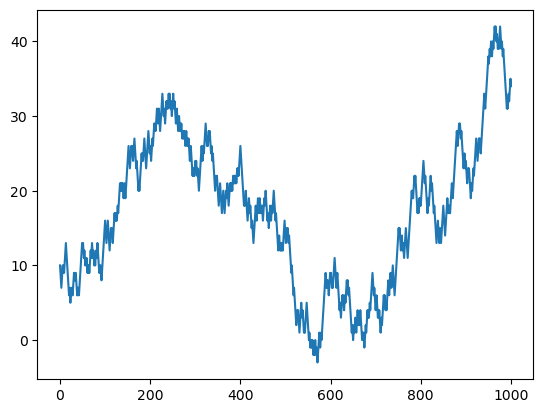

In [111]:
import matplotlib.pyplot as plt

def marche_aleatoire(i: int, n: int):    
    marche = [i]
    for x in range(n):
        r = random.random() # 0 <= r <= 1
        if r < 0.5:
            marche.append(marche[x]+1) # on avance
        else:
            marche.append(marche[x]-1) # on recule
    plt.plot(marche)
    plt.show()

marche_aleatoire(10, 1000)

### Exercice 5

Choisir une chaine de Markov $(Xn)$ à 5 états, irréductible et apériodique. On notera $P$ sa matrice de transition. On veut illustrer la convergence vers la loi stationnaire.

Choisir une distribution initiale $C$ puis afficher la loi de $X_1,...,X_{10}$ sous la forme d’un histogramme. Refaire l’essai avec d’autres valeurs de $C$ et en déduire une estimation de la loi stationnaire.

In [92]:
P = np.array([
    (0.2, 0.3, 0.1, 0.2, 0.2),
    (0.1, 0.4, 0.2, 0.2, 0.1),
    (0.3, 0.2, 0.2, 0.1, 0.2),
    (0.2, 0.2, 0.2, 0.3, 0.1),
    (0.2, 0.1, 0.3, 0.1, 0.3)])

print("P :\n", P.view())



P :
 [[0.2 0.3 0.1 0.2 0.2]
 [0.1 0.4 0.2 0.2 0.1]
 [0.3 0.2 0.2 0.1 0.2]
 [0.2 0.2 0.2 0.3 0.1]
 [0.2 0.1 0.3 0.1 0.3]]
